### 객체를 이용하여 그래프 속성 변경

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

<class 'matplotlib.axes._subplots.AxesSubplot'>


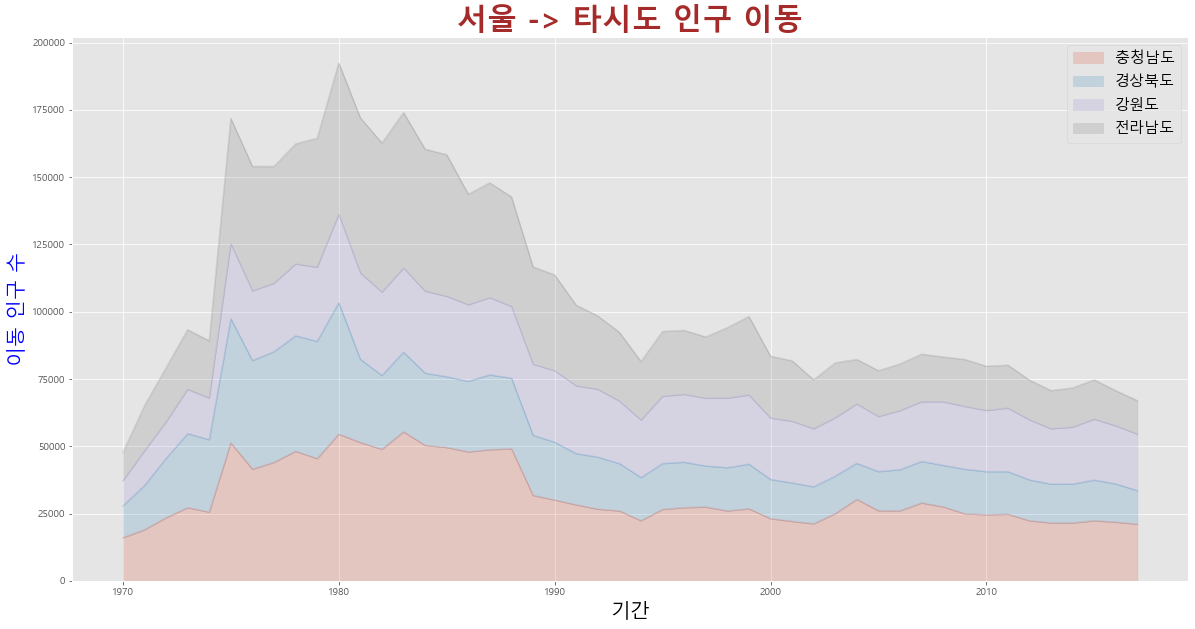

In [5]:
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

df_4.index = df_4.index.map(int)

ax = df_4.plot(kind = 'area', stacked = True, alpha = 0.2, figsize = (20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size =30, color = 'brown', weight = 'bold')
ax.set_ylabel('이동 인구 수', size = 20, color = 'blue')
ax.set_xlabel('기간', size = 20, color = 'black')
ax.legend(loc = 'best', fontsize = 15)

plt.show()